# Bayesian Learning

In [45]:
%run Preprocessing.ipynb

(1549, 100)
(665, 100)


In [46]:
# Import packages
import seaborn as sns
import statistics
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Naive Bayes

In [47]:
# Load train and test sets from Preprocessing file
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

# Function for plotting confusion matrix
def plot_confusion_matrix(train_p, train, dom):
    cf = confusion_matrix(train_p,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    # plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()


**Bernoulli:** 84% accuracy

Parameters:
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- binarize: Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.
- fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [48]:
# Bernoulli Naive Bayes
b_model = BernoulliNB(alpha=1, binarize=None, fit_prior=True, class_prior=None)
b_model.fit(x_train, y_train)

BernoulliNB(alpha=1, binarize=None)

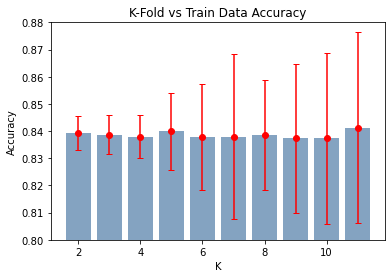

In [62]:
# Perform k-fold validation on training data
x = []
y = []
error = []
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(b_model, x_train, y_train, cv= kf, scoring="accuracy")
    x.append(i)
    y.append(score.mean())
    error.append(statistics.stdev(score))

plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.errorbar(x, y, yerr = error, barsabove = False, fmt ='o', capsize = 3, color = 'red')

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.88)
# plt.savefig('k_fold.png')
plt.show()

In [50]:
# Check k-fold split
kf =KFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(b_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score(in %): {"{:.2f}".format(score.mean()*100)}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.86451613 0.8        0.83225806 0.85806452 0.82580645 0.8
 0.81935484 0.88387097 0.87741935 0.81168831]
Average score(in %): 83.73
Standard Deviation in score: 0.03


In [51]:
# Compare train & test data
y_train_pred = b_model.predict(x_train)
y_test_pred = b_model.predict(x_test)

print(f'Bernoulli Naive Bayes Train Model Accuracy(in %): {accuracy_score(y_train_pred,y_train)*100}')
print(f'Bernoulli Naive Bayes Test Model Accuracy(in %): {accuracy_score(y_test_pred,y_test)*100}')

Bernoulli Naive Bayes Train Model Accuracy(in %): 84.1833440929632
Bernoulli Naive Bayes Test Model Accuracy(in %): 86.1654135338346


In [52]:
# Get classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      1148
         1.0       0.70      0.68      0.69       401

    accuracy                           0.84      1549
   macro avg       0.79      0.79      0.79      1549
weighted avg       0.84      0.84      0.84      1549



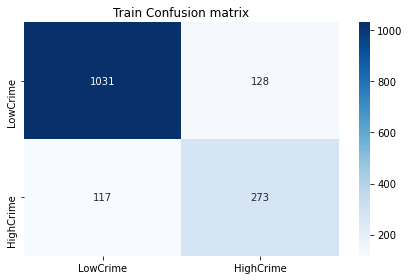

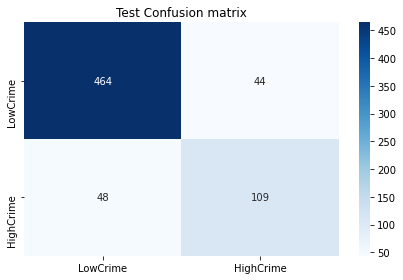

In [53]:
# Plot confusion matrix
plot_confusion_matrix(y_train_pred,y_train,dom='Train')
plot_confusion_matrix(y_test_pred,y_test,dom='Test')

**Gaussian:** 83% accuracy

Parameters:
- priors: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
- var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [54]:
# Gaussian Naive Bayes
gnb_model = GaussianNB(priors=None, var_smoothing=1e-9)
gnb_model.fit(x_train, y_train)

GaussianNB()

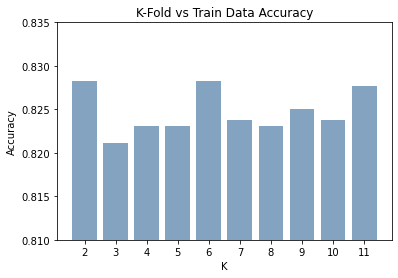

In [55]:
# Perform k-fold validation on training data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(gnb_model, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.81, 0.835)
plt.show()

In [56]:
# Check k-fold validation
kf =KFold(n_splits=6, shuffle=True, random_state=42)
score = cross_val_score(gnb_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.81853282 0.86046512 0.84108527 0.79844961 0.82170543 0.82945736]
Average score: 0.83
Standard Deviation in score: 0.02


In [57]:
# Compare train & test data
y_train_pred = gnb_model.predict(x_train)
y_test_pred = gnb_model.predict(x_test)

print(f'Gaussian Naive Bayes Train Model Accuracy(in %): {accuracy_score(y_train_pred,y_train)*100}')
print(f'Gaussian Naive Bayes Test Model Accuracy(in %): {accuracy_score(y_test_pred,y_test)*100}')

Gaussian Naive Bayes Train Model Accuracy(in %): 82.82763072950291
Gaussian Naive Bayes Test Model Accuracy(in %): 86.01503759398497


**Multinomial:** 83% accuracy

Parameters:
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [58]:
# Multinomial Naive Bayes
m_model = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
m_model.fit(x_train, y_train)

MultinomialNB(alpha=1)

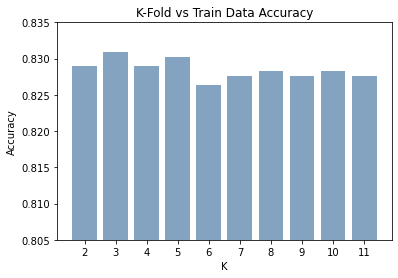

In [59]:
# Perform k-fold validation on training data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(m_model, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.805, 0.835)
plt.show()

In [60]:
# Check k-fold split
kf =KFold(n_splits=3, shuffle=True, random_state=42)
score = cross_val_score(m_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.83365571 0.82751938 0.83139535]
Average score: 0.83
Standard Deviation in score: 0.00


In [61]:
# Compare train &  test data
y_train_pred = m_model.predict(x_train)
y_test_pred = m_model.predict(x_test)

print(f'Multinomial Naive Bayes Train Model Accuracy(in %): {accuracy_score(y_train_pred,y_train)*100}')
print(f'Multinomial Naive Bayes Test Model Accuracy(in %): {accuracy_score(y_test_pred,y_test)*100}')

Multinomial Naive Bayes Train Model Accuracy(in %): 83.15041962556488
Multinomial Naive Bayes Test Model Accuracy(in %): 86.1654135338346
